# Overview

In this notebook, we will explore if we can extract relationship between different keys (in a json data) that belong to different json docs. Of course all json docs have the same schema

## Setup

In [1]:
#!pip install openai

In [2]:
#!pip install python-dotenv

In [3]:
import os
import openai
import matplotlib.image as img
import matplotlib.pyplot as plt
from dotenv import load_dotenv, find_dotenv

_ = load_dotenv(find_dotenv()) 
openai.api_key  = os.getenv('OPENAI_API_KEY')

In [4]:
def get_completion(prompt, model="gpt-3.5-turbo"):
    messages = [{"role": "user", "content": prompt}]
    response = openai.ChatCompletion.create(
        model=model,
        messages=messages,
        temperature=0, 
    )
    return response.choices[0].message["content"]

def get_completion_from_messages(messages, model="gpt-3.5-turbo", temperature=0):
    response = openai.ChatCompletion.create(
        model=model,
        messages=messages,
        temperature=temperature, 
    )
#     print(str(response.choices[0].message))
    return response.choices[0].message["content"]

In [5]:
#The following at the entities in this case:
#- user.
#- MCO CR located in ACM hub.
#- Manifestwork located in ACM hub.
#- work agent located in the Managed cluster.
#- observability endpoint operator located in the Managed cluster.
#- secret for the TLS located in the managed cluster.
#- cluster-monitorig-config configmap located in the managed cluster.
#- Prometheus located in the managed cluster.
#- Alertmanager route located in the ACM hub.
#- Alertmanager located in the ACM hub.


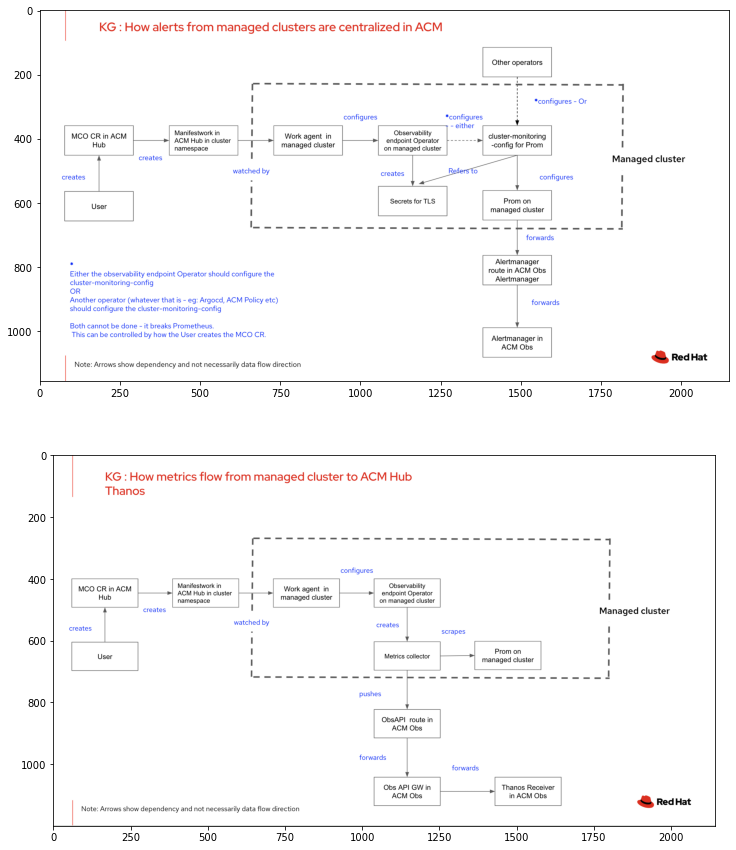

In [7]:
im_1 = img.imread('images/KG-Alerts-from-ACM.png')
im_2 = img.imread('images/KG-Metrics-from-ACM.png')

#plt.imshow(im_1)
fig, ax = plt.subplots(2,figsize=(15, 15))
ax[0].imshow(im_1)
ax[1].imshow(im_2)
#ax.set_title('KG: Alerts from managed cluster to ACM')


plt.show()

In [8]:
fact_use_case_1 = """
Case-1:

Sometimes the managed cluster is called spoke cluster.

User creates MCO CR in ACM hub.
The MCO CR in ACM hub creates ManifestWork in ACM hub.
The Manifestwork in ACM hub is watched by work agent in the Managed cluster.
Work agent in the managed cluster creates the observability endpoint operator in the Managed cluster.
The observability endpoint operator configures the cluster-monitorig-config configmap in the managed cluster.
The observability endpoint operator creates the secret for the TLS in the managed cluster.
The cluster-monitorig-config configmap in the managed cluster configures the Prometheus in the managed cluster.
The prometheus in the managed cluster forwards the alerts to the Alertmanager route in the ACM hub.
The alertmanager route fowards the alerts to the alertmanager in the ACM hub.

Case-2:
User creates MCO CR in ACM hub.
The MCO CR in ACM hub creates ManifestWork in ACM hub.
The Manifestwork in ACM hub is watched by work agent in the Managed cluster.
Work agent in the managed cluster creates the observability endpoint operator in the Managed cluster.
The observability endpoint operator creates the metric collector in the managed cluster.
The metric collector scrapes the prometheus in the managed cluster.
The metric collector fowards the metrics to the Obs-API-Gateway route in the ACM hub.
The Obs-API-Gateway route forwards the metrics to the Obs-API-Gateway pod in the ACM hub.

"""

In [9]:
# This purely technical specs and so answers to these question should be purely techical.
# Focus on the entities and their relationships.

In [10]:
prompt = f"""
The technical specs are delimited by triple backticks.
Your task is to answer the following question based on data in ```{fact_use_case_1}```

This purely technical specs and so answers to these question should be purely techical. 
Focus on the entities and their relationships.

1. How many different kind of clusters do we talk about
2. How many different type of clusters do we talk about
3. What are the entities in the hub cluster
4. What are the entities in the managed cluster
5. Think before answering careully. What are the entities in the spoke cluster.
6. What does the case describe
7. What could go wrong if alerts does not show up the alertmanager in the acm hub
8. What could go wrong if metrics does not show up the in the acm hub
9. Who generates the metrics and from where
10. Where the does metrics go to
11. What are the routes in the ACM Hub cluster



"""
response = get_completion(prompt)
print(response)

1. We talk about two different kinds of clusters: the hub cluster and the managed cluster.
2. We talk about two different types of clusters: the ACM hub cluster and the managed cluster.
3. The entities in the hub cluster are: MCO CR, ManifestWork, observability endpoint operator, cluster-monitoring-config configmap, secret for TLS, Prometheus, and alertmanager route.
4. The entities in the managed cluster are: work agent, observability endpoint operator, cluster-monitoring-config configmap, secret for TLS, Prometheus, and metric collector.
5. Based on the given information, there is no mention of any entities specifically related to the spoke cluster.
6. The case describes the process of setting up observability and monitoring in the managed cluster using the ACM hub cluster.
7. If alerts do not show up in the alertmanager in the ACM hub, it could indicate a failure in the communication between the managed cluster and the ACM hub. This could result in missed or delayed alerts, leading 

In [11]:
fact_use_case_2 = """
<?xml version='1.0' encoding='utf-8'?>
<graphml xmlns="http://graphml.graphdrawing.org/xmlns" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" xsi:schemaLocation="http://graphml.graphdrawing.org/xmlns http://graphml.graphdrawing.org/xmlns/1.0/graphml.xsd">
  <key id="d8" for="edge" attr.name="relation" attr.type="string" />
  <key id="d3" for="node" attr.name="location" attr.type="string" />
  <key id="d2" for="node" attr.name="Kubetype" attr.type="string" />
  <key id="d1" for="node" attr.name="name" attr.type="string" />
  <key id="d0" for="node" attr.name="entity" attr.type="string" />
  <graph edgedefault="directed">
    <node id="1">
      <data key="d0">Users</data>
      <data key="d1">User</data>
    </node>
    <node id="2">
      <data key="d0">API</data>
      <data key="d1">MCO-CR</data>
      <data key="d2">Custom Resource</data>
      <data key="d3">Hub Cluster</data>
    </node>
    <node id="3">
      <data key="d0">IntermediateResources</data>
      <data key="d1">ManifestWork</data>
      <data key="d2">Custom Resource</data>
      <data key="d3">Hub Cluster</data>
    </node>
    <node id="4">
      <data key="d0">Processor</data>
      <data key="d1">WorkAgent</data>
      <data key="d2">Controller</data>
      <data key="d3">Managed Cluster</data>
    </node>
    <node id="5">
      <data key="d0">Processor</data>
      <data key="d1">Observability Endpoint Operator</data>
      <data key="d2">Controller</data>
      <data key="d3">Managed Cluster</data>
    </node>
    <node id="6">
      <data key="d0">API</data>
      <data key="d1">cluster-monitoring-config</data>
      <data key="d2">Configmap</data>
      <data key="d3">Managed Cluster</data>
    </node>
    <node id="7">
      <data key="d0">IntermediateResources</data>
      <data key="d1">alert-manager-hub-tls-secret</data>
      <data key="d2">Secret</data>
      <data key="d3">Managed Cluster</data>
    </node>
    <node id="8">
      <data key="d0">Processor</data>
      <data key="d1">Prometheus</data>
      <data key="d2">Pod</data>
      <data key="d3">Managed Cluster</data>
    </node>
    <node id="9">
      <data key="d0">Gateway</data>
      <data key="d1">Observatorium-api-gateway</data>
      <data key="d2">Route</data>
      <data key="d3">Hub Cluster</data>
    </node>
    <node id="10">
      <data key="d0">Processor</data>
      <data key="d1">alert-manager</data>
      <data key="d2">Pod</data>
      <data key="d3">Hub Cluster</data>
    </node>        
    <edge source="1" target="2">
      <data key="d8">CREATES</data>
    </edge>
    <edge source="2" target="3">
      <data key="d8">CREATES</data>
    </edge>
    <edge source="3" target="4">
      <data key="d8">WATCHED BY</data>
    </edge>
    <edge source="4" target="5">
      <data key="d8">CONFIGURES</data>
    </edge>
    <edge source="5" target="6">
      <data key="d8">CONFIGURES</data>
    </edge>
    <edge source="5" target="7">
      <data key="d8">CREATES</data>
    </edge>
    <edge source="6" target="7">
      <data key="d8">REFERS</data>
    </edge>
    <edge source="6" target="8">
      <data key="d8">CONFIGURES</data>
    </edge> 
    <edge source="8" target="9">
      <data key="d8">FORWARDS</data>
    </edge> 
    <edge source="9" target="10">
      <data key="d8">FORWARDS</data>
    </edge>    
  </graph>
</graphml>
"""


In [12]:
prompt = f"""
The technical specs are delimited by triple backticks.
Your task is to answer the following question based on data in ```{fact_use_case_2}```

This purely technical specs and so answers to these question should be purely techical. 
Focus on the entities and their relationships. This data is in a GraphML format. 
Focus only on this data while answering this question and do not make up any answers.
Sometimes managed cluster and spoke clusters are used interchangeably.
Use only this data to answer the following questions.


1. How many different kind of clusters do we talk about
2. How many different type of clusters do we talk about
3. What are the entities in the hub cluster
4. What are the entities in the managed cluster
5. Think before answering careully. What are the entities in the spoke cluster.
6. What does the case describe
7. What could go wrong if alerts does not show up the alertmanager in the acm hub
8. What could go wrong if metrics does not show up the in the acm hub
9. Who generates the metrics and from where
10. Where the does metrics go to
11. What are the routes in the ACM Hub cluster
12. What things are created by the User directly
13. What entity does the User entity create directly



"""
response = get_completion(prompt)
print(response)

1. There are two different kinds of clusters mentioned in the data: the Hub Cluster and the Managed Cluster.
2. There are two different types of clusters mentioned in the data: the Hub Cluster and the Managed Cluster.
3. The entities in the Hub Cluster are:
   - API (MCO-CR)
   - IntermediateResources (ManifestWork)
   - Processor (Observability Endpoint Operator)
   - API (cluster-monitoring-config)
   - IntermediateResources (alert-manager-hub-tls-secret)
   - Processor (alert-manager)
4. The entities in the Managed Cluster are:
   - Processor (WorkAgent)
   - Processor (Prometheus)
5. There is no specific mention of a spoke cluster in the given data. Therefore, we cannot determine the entities in the spoke cluster based on this data alone.
6. The case describes a system architecture involving a Hub Cluster and a Managed Cluster, where various entities interact and create relationships with each other.
7. If alerts do not show up in the alertmanager in the ACM Hub, it could indicate 